In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


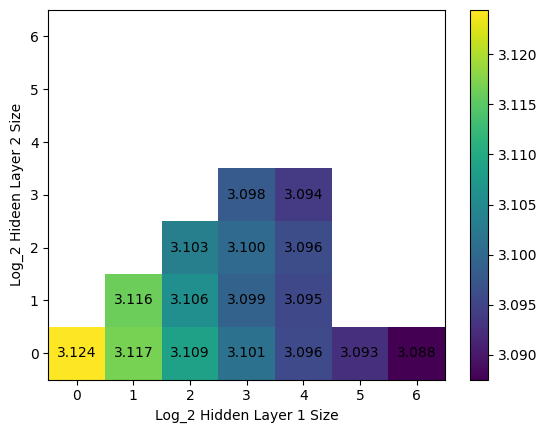

In [57]:

x = [2**i for i in range(0, 7)]
y = np.array([2**i for i in range(0, 7)])
z = np.empty(shape=(len(x), len(y)))
z[:] = np.nan

for i in x:
    for j in y[y <= i]:
        try:
            test_data = np.fromfile("trainingloss/HL2_" + str(i) + "_" + str(j) + ".csv", sep=',')
            #print(test_data)
            z[int(np.log2(j)), int(np.log2(i))] = np.median(test_data[-1])
        except FileNotFoundError:
            pass

plt.pcolormesh(np.log2(y), np.log2(x), z, norm="linear")

for i in range(len(x)):
    for j in range(len(y)):
        if ~np.isnan(z[j, i]): plt.text(i, j, f"{z[j, i]:.3f}", ha = 'center', va = 'center')

plt.colorbar()
plt.xlabel("Log_2 Hidden Layer 1 Size")
plt.ylabel("Log_2 Hideen Layer 2 Size")
plt.show()